In [2]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import math
import cv2 as cv

In [19]:
import dicom2nifti
from dicom2nifti.convert_dir import convert_directory
import nibabel as nib
import pydicom
import os

In [197]:
path_slice = "../dataset/Task07_Pancreas/imagesTr/pancreas_001.nii.gz"
path_label='../dataset/Task07_Pancreas/labelsTr/pancreas_001.nii.gz'
test_load = nib.load('../dataset/Task07_Pancreas/imagesTr/pancreas_291.nii.gz').get_fdata()
test_load_label = nib.load('../dataset/Task07_Pancreas/labelsTr/pancreas_291.nii.gz').get_fdata()
test_load.shape
slices=test_load.shape[2]

In [172]:
def find_slice(slices,category):
    best = 0
    slice_no = 0
    for x in range(slices):
        mat = np.matrix(test_load_label[:, :, x])
        current = np.count_nonzero(mat == category)

        if current > best:
           
            best = current
            slice_no = x
    return slice_no

In [198]:
pancreas_best = find_slice(slices,1)
tumor_best = find_slice(slices,2)

print(pancreas_best)
print(tumor_best)

57
40


In [199]:
new_label = np.maximum(test_load_label[:, :, pancreas_best],test_load_label[:, :, tumor_best])
new_label.shape

(512, 512)

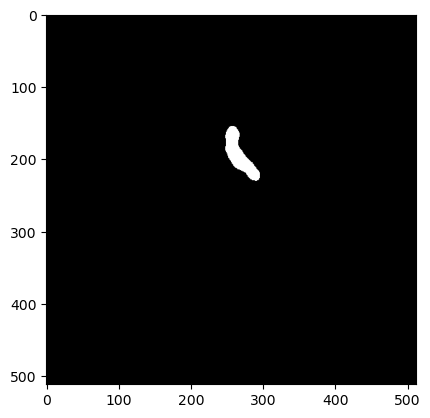

In [200]:
imgplot=plt.imshow(test_load_label[:, :, pancreas_best], cmap="gray")  
plt.show()


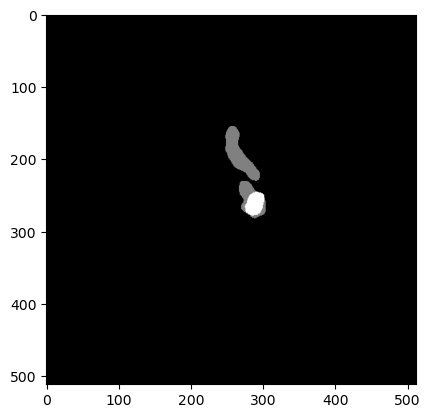

In [201]:
imgplot=plt.imshow(new_label, cmap="gray")  
plt.show()


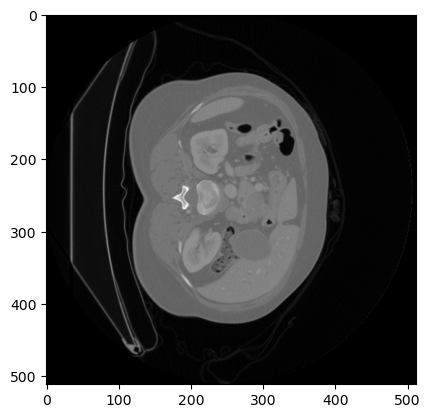

In [202]:
imgplot=plt.imshow(test_load[:,:,tumor_best], cmap="gray")  
plt.show()

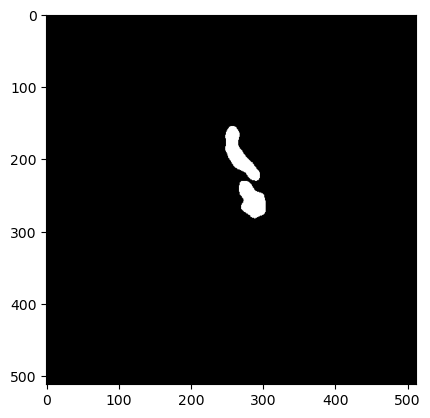

In [203]:
threshold=0.
ret,binary_mask=cv.threshold(new_label,threshold,2.,cv.THRESH_BINARY)
# print(binary_mask.shape)
binary_mask[binary_mask != 0] = 1.

plt.imshow(binary_mask,cmap="gray")
plt.show()

In [204]:
result = binary_mask*test_load[:,:,pancreas_best]
result[result == 0] = -1024.

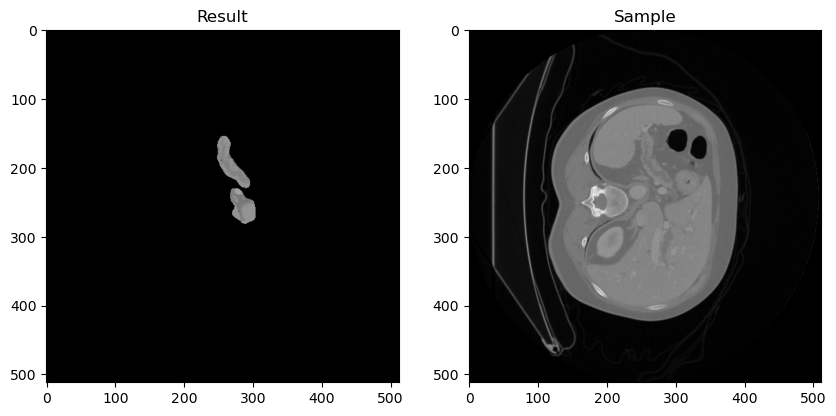

In [205]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.imshow(result, cmap="gray",vmin=-1024,vmax=1023)
plt.title("Result")

plt.subplot(1,2,2)
plt.imshow(test_load[:,:,pancreas_best],cmap="gray")
plt.title("Sample")

plt.show()


In [16]:
# non_zero_rows = result[~(result== -1024.).all(axis=1)]

# # Print the rows with non-zero elements
# for row in non_zero_rows:
#     print(row)

In [41]:
#Texture Analysis
# from skimage import segmentation

In [39]:

# regions = segmentation.slic(result, n_segments=150)
# std_images = []
# for region in regions:
#     std_image = np.std(result[region], axis=(0, 1))
#     std_images.append(std_image)



In [17]:
# std_images

In [42]:
# path_slice

# x[0]

In [123]:
# #NiFTi to Dicom
dcm_slice_path  = "../Segment_data/Tumor_pancreas/Pancreas_slice"
dcm_mask_path = "../Segment_data/Tumor_pancreas/Mask"
dcm_result_path = "../Segment_data/Tumor_pancreas/Result"

x=os.path.split(path_slice)[-1].split(".")[0]
# y=os.path.split(path_label)[-1].split(".")[0]
dicom_dir_slice = os.path.join(dcm_slice_path, f"{x}.dcm")
dicom_dir_label = os.path.join(dcm_mask_path, f"{x}.dcm")
dicom_dir_result = os.path.join(dcm_result_path, f"{x}_result.dcm")

dicom_dir_result


'../Segment_data/Tumor_pancreas/Result/pancreas_001_result.dcm'

In [29]:
type(test_load[:,:,pancreas_best])
test_load[:,:,pancreas_best].dtype

dtype('float64')

In [124]:
result.dtype

dtype('float64')

In [125]:
def convertNsave(arr):
    """
    `arr`: parameter will take a numpy array that represents only one slice.
    `file_dir`: parameter will take the path to save the slices
    `index`: parameter will represent the index of the slice, so this parameter will be used to put 
    the name of each slice while using a for loop to convert all the slices
    """
    
    dicom_file = pydicom.dcmread('../Segment_data/Tumor_pancreas/Pancreas_slice/1-003.dcm')
    arr = arr.astype('int16')
    dicom_file.Rows = arr.shape[0]
    dicom_file.Columns = arr.shape[1]
    dicom_file.PhotometricInterpretation = "MONOCHROME2"
    dicom_file.SamplesPerPixel = 1
    dicom_file.BitsStored = 16
    dicom_file.BitsAllocated = 16
    dicom_file.HighBit = 15
    dicom_file.PixelRepresentation = 1
    dicom_file.PixelData = arr.tobytes()
    dicom_file.save_as(dicom_dir_result)
    


In [127]:
convertNsave(result)

In [195]:
image = pydicom.dcmread("../Segment_data/Tumor_pancreas/Mask/pancreas_291.dcm").pixel_array
image.dtype

dtype('uint16')

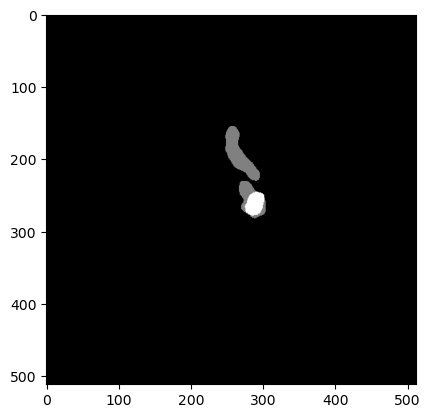

In [196]:
plt.imshow(image,cmap="gray")
plt.show()

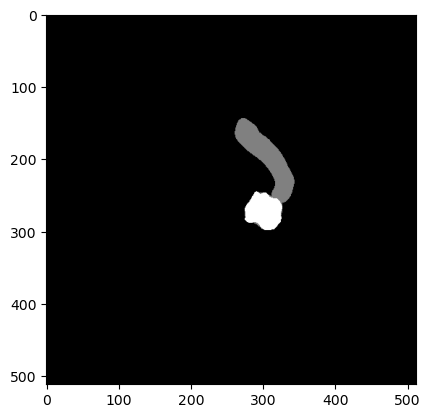

In [133]:
plt.imshow(new_label,cmap="gray")
plt.show()

In [136]:
path = "../dataset/Task07_Pancreas/labelsTr"
for i in os.listdir(path):
    x=i.split('.')[0]
    print(x)
    break

pancreas_001
